In [1]:
import sys
sys.path.append('C:/Python34/Lib/site-packages')
import numpy as np
from scipy import stats
import math
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Exploring the Bivariate Normal

In [2]:
"""
Galton's dataset

heights = Table.read_table('Galton.csv')
# Data from http://www.math.uah.edu/stat/data/Galton.html
heights
father_son = heights.where("Gender", "M").drop(["Family", "Mother", "Gender", "Kids"])
father_son = father_son.relabeled(1, "Son")
father_son
"""

'\nGalton\'s dataset\n\nheights = Table.read_table(\'Galton.csv\')\n# Data from http://www.math.uah.edu/stat/data/Galton.html\nheights\nfather_son = heights.where("Gender", "M").drop(["Family", "Mother", "Gender", "Kids"])\nfather_son = father_son.relabeled(1, "Son")\nfather_son\n'

In [3]:
father_son = Table.read_table("Pearson.csv")
# Data from http://www.math.uah.edu/stat/data/Pearson.html
father_son

Father,Son
65,59.8
63.3,63.2
65,63.3
65.8,62.8
61.1,64.3
63,64.2
65.4,64.1
64.7,64
66.1,64.6
67,64


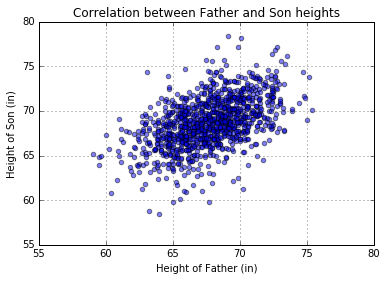

In [4]:
plt.scatter(father_son["Father"], father_son["Son"], alpha=0.5)
plt.title("Correlation between Father and Son heights")
plt.xlabel("Height of Father (in)")
plt.ylabel("Height of Son (in)")
plt.grid(True, which='both')

In [5]:
father_mean = np.mean(father_son["Father"])
father_sd = np.std(father_son["Father"])
son_mean = np.mean(father_son["Son"])
son_sd = np.std(father_son["Son"])

rho = np.corrcoef(father_son["Father"], father_son["Son"])

print("Fathers:")
print("Mean:", father_mean, "SD", father_sd)
print("Sons:")
print("Mean:", son_mean, "SD", son_sd)
print("Correlation", rho[0][1])

Fathers:
Mean: 67.6868274583 SD 2.74455320767
Sons:
Mean: 68.6842300557 SD 2.81488752069
Correlation 0.501162680808


In [6]:
std_father_son = Table.copy(father_son)
std_father_son["Father"] = stats.zscore(father_son["Father"])
std_father_son["Son"] = stats.zscore(father_son["Son"])

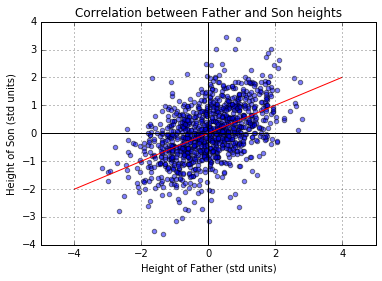

In [7]:
plt.scatter(std_father_son["Father"], std_father_son["Son"], alpha=0.5)
t = np.arange(-4, 4, 0.02)
plt.plot(t, t*rho[0][1], "r")
plt.title("Correlation between Father and Son heights")
plt.xlabel("Height of Father (std units)")
plt.ylabel("Height of Son (std units)")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

## Exploring correlation
We can model a pair of correlated standard normal variables $ X $ and $ Y $ as a pair of independent standard normal variables $X$ and $Z$ projected onto an axis at an angle $\theta$, giving us the equation:
$$ Y = X \cos \theta + Z \sin \theta $$
Each values $\rho$ corresponds to such as projection if we set $\cos\theta = \rho$ and $\sin\theta = \sqrt{1-\rho^2}$.

We can explore how correlation changes as $\theta$ changes

rho=0.0


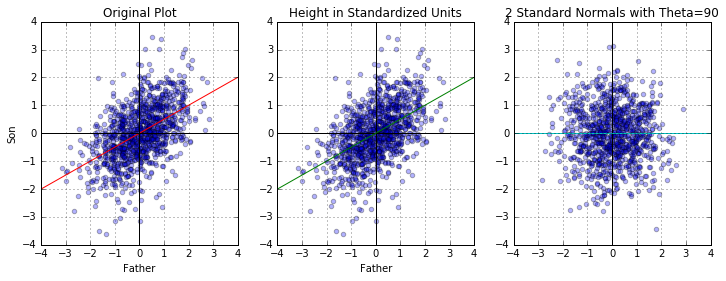

In [8]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

theta_slider = widgets.IntSlider(value=90, min=0, max=180, description=r'$\theta$')
zoom = 4
x = np.random.standard_normal(1000)
z = np.random.standard_normal(1000)

@interact(theta = theta_slider)
def plot(theta):
    
    t = theta*np.pi/180
    r = np.cos(t)
    print("rho=%s" % round((r),3))
    fig = plt.figure(figsize=(12, 4))
    s = np.arange(-4, 4, 0.02)

    sub1 = fig.add_subplot(131)
    sub1.scatter(std_father_son["Father"], std_father_son["Son"], alpha = 0.3)
    sub1.set_xlim([-zoom, zoom])
    sub1.set_ylim([-zoom, zoom])
    plt.plot(s, s*rho[0][1], "r")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.ylabel("Son")
    plt.xlabel("Father")
    plt.title("Original Plot")
    plt.grid(True, which='both')


    sub2 = fig.add_subplot(132)
    sub2.scatter(std_father_son["Father"], 
                 std_father_son["Father"]*np.cos(t) + std_father_son["Son"]*np.sin(t), alpha=0.3)
    sub2.set_xlim([-zoom, zoom])
    sub2.set_ylim([-zoom, zoom])
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(s, s*(rho[0][1] + r), "g")
    #plt.ylabel("Son")
    plt.xlabel("Father")
    plt.title("Height in Standardized Units")
    plt.grid(True, which='both')

    sub3 = fig.add_subplot(133)
    sub3.set_xlim([-zoom, zoom])
    sub3.set_ylim([-zoom, zoom])
    sub3.scatter(x, x*np.cos(t) + z*np.sin(t), alpha = 0.3)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(s, s*r, "c")
    plt.title("2 Standard Normals with Theta=%s" % (theta))
    plt.grid(True, which='both')

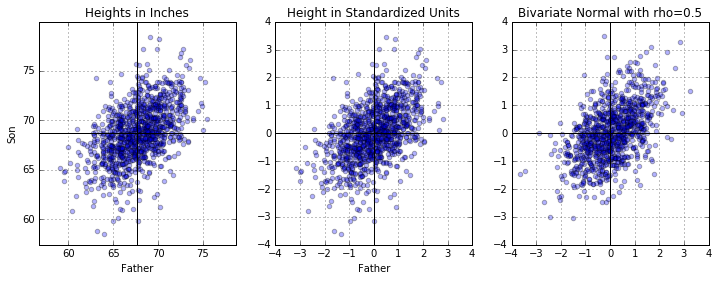

In [9]:
zoom = 4

fig = plt.figure(figsize=(12, 4))

sub1 = fig.add_subplot(131)
sub1.scatter(father_son["Father"], father_son["Son"], alpha = 0.3)
sub1.set_xlim([father_mean-zoom*father_sd,father_mean+zoom*father_sd])
sub1.set_ylim([son_mean-zoom*son_sd,son_mean+zoom*son_sd])
plt.axhline(y=son_mean, color='k')
plt.axvline(x=father_mean, color='k')
plt.ylabel("Son")
plt.xlabel("Father")
plt.title("Heights in Inches")
plt.grid(True, which='both')


sub2 = fig.add_subplot(132)
sub2.scatter(std_father_son["Father"], std_father_son["Son"], alpha=0.3)
sub2.set_xlim([-zoom, zoom])
sub2.set_ylim([-zoom, zoom])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
#plt.ylabel("Son")
plt.xlabel("Father")
plt.title("Height in Standardized Units")
plt.grid(True, which='both')

sub3 = fig.add_subplot(133)
sub3.set_xlim([-zoom, zoom])
sub3.set_ylim([-zoom, zoom])
x, y = np.random.multivariate_normal([0,0], rho, 1000).T
sub3.scatter(x, y, alpha = 0.3)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("Bivariate Normal with rho=%s" % (round(rho[0][1], 2)))
plt.grid(True, which='both')

## Conditional Expectation of Y given X

How well does $E(Y|X = x) = \rho x$ actually hold up?

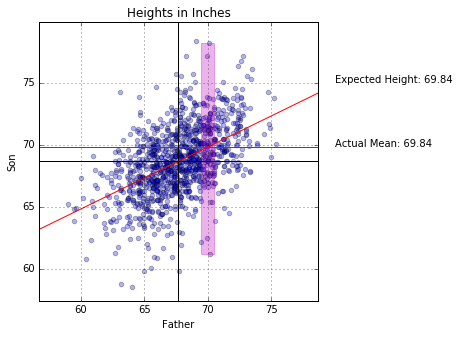

In [10]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as patches
zoom = 4
father_height = widgets.Text(description='Height of father:', value='70')
margin_slider = widgets.FloatSlider(value=0.5, min=0.1,max=5,step=0.1,description='Margin')

@interact(fh = father_height, margin = margin_slider)
def plot(fh, margin):
    
    height = float(fh)

    
    subset = father_son.where(father_son["Father"] < height + margin)
    subset = subset.where(subset["Father"] > height - margin)
    son_min = np.min(subset["Son"])
    son_max = np.max(subset["Son"])
    
    t = np.arange(55, 80, 0.5)
        
    fig = plt.figure(figsize=(5, 5))

    sub1 = fig.add_subplot(111)
    sub1.scatter(father_son["Father"], father_son["Son"], alpha = 0.3)
    
    sub1.add_patch(
        patches.Rectangle(
                (height - margin, son_min),   # (x,y)
                margin*2,          # width
                son_max - son_min,          # height
                alpha=0.3,
                color="m"
        )
    )
    
    actual_mean = np.mean(subset["Son"])
    plt.plot(t, rho[0][1]*(t-father_mean) + son_mean, color="red")
    plt.axhline(y=actual_mean, color='m')
    
    sub1.set_xlim([father_mean-zoom*father_sd,father_mean+zoom*father_sd])
    sub1.set_ylim([son_mean-zoom*son_sd,son_mean+zoom*son_sd])
    plt.text(80, 75, "Expected Height: %s" % (round(rho[0][1]*(height-father_mean) + son_mean, 2)))
    plt.text(80, actual_mean, "Actual Mean: %s" %(round(actual_mean, 2)))
    plt.axhline(y=son_mean, color='k')
    plt.axvline(x=father_mean, color='k')
    plt.ylabel("Son")
    plt.xlabel("Father")
    plt.title("Heights in Inches")
    plt.grid(True, which='both')
    